In [1]:
import numpy as np
import sys
sys.path.append('./ckplotlib/')
import map_funcs
from IPython.display import Image
#
import xarray as xr
import xesmf as xe
import smoothlib
import geog_funcs

1.6.1


In [2]:
models_list = (
    'CanESM5',
    'CESM2',
    'CNRM-ESM2-1',
    'GISS-E2-1-G'
    )

exps_list = ('piControl','1pctco2-bgc','1pctco2')

vars_list = ('tas','fgco2','netAtmosLandCO2Flux')

nmodels = len(models_list)
nvars = len(vars_list)
nexps = len(exps_list)

file_master_list_dynamics = [[[[] for i in range(nexps )] for j in range(nvars)] for k in range(nmodels)]
### index this file as [model_i][var_i][exp_i]

y_4xco2 = 140 - 1
t_4xco2 = (y_4xco2+1)*12-1


regrid_lons = np.arange(-179.5,180.5,1.)
regrid_lats = np.arange(-89.5,90.5,1.)

# make a dataset on the new grid
ds_out = xr.Dataset({'lat': (['lat'], regrid_lats),
                     'lon': (['lon'], regrid_lons),
                    })

### assume uniform CO2 trajectories as if all the models followed the protocol
pico2 = 284.7
delta_co2_ppm_4xco2 = 3.*pico2

In [3]:
### load all the files for CESM2

model_i = models_list.index('CESM2')

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('piControl')] = [
    'tas_Amon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
    'tas_Amon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2-bgc')] = [
    'tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
    'tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
    'tas_Amon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2')] = [
    'tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
    'tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
    'tas_Amon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('piControl')] = [
    'netAtmosLandCO2Flux_Emon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
    'netAtmosLandCO2Flux_Emon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2-bgc')] = [
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2')] = [
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
    'netAtmosLandCO2Flux_Emon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('piControl')] = [
    'fgco2_Omon_CESM2_piControl_r1i1p1f1_gn_050001-059912.nc',
    'fgco2_Omon_CESM2_piControl_r1i1p1f1_gn_060001-069912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2-bgc')] = [
    'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_000101-005012.nc',
    'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_005101-010012.nc',
    'fgco2_Omon_CESM2_1pctCO2-bgc_r1i1p1f1_gn_010101-015012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2')] = [
    'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_000101-005012.nc',
    'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_005101-010012.nc',
    'fgco2_Omon_CESM2_1pctCO2_r1i1p1f1_gn_010101-015012.nc'
]

In [4]:
### load all the files for CanESM5

model_i = models_list.index('CanESM5')

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('piControl')] = [
'tas_Amon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc',
'tas_Amon_CanESM5_piControl_r1i1p1f1_gn_540101-560012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2-bgc')] = [
'tas_Amon_CanESM5_1pctCO2-bgc_r1i1p1f1_gn_185001-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2')] = [
'tas_Amon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('piControl')] = [
'netAtmosLandCO2Flux_Emon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc',
'netAtmosLandCO2Flux_Emon_CanESM5_piControl_r1i1p1f1_gn_540101-560012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2-bgc')] = [
'netAtmosLandCO2Flux_Emon_CanESM5_1pctCO2-bgc_r1i1p1f1_gn_185001-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2')] = [
'netAtmosLandCO2Flux_Emon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('piControl')] = [
'fgco2_Omon_CanESM5_piControl_r1i1p1f1_gn_520101-540012.nc',
'fgco2_Omon_CanESM5_piControl_r1i1p1f1_gn_540101-560012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2-bgc')] = [
'fgco2_Omon_CanESM5_1pctCO2-bgc_r1i1p1f1_gn_185001-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2')] = [
'fgco2_Omon_CanESM5_1pctCO2_r1i1p1f1_gn_185001-200012.nc'
]

In [5]:
### load all the files for GISS-E2-1-G

model_i = models_list.index('GISS-E2-1-G')

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('piControl')] = [
'tas_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_415001-420012.nc',
'tas_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_420101-425012.nc',
'tas_Amon_GISS-E2-1-G_piControl_r1i1p1f1_gn_425101-430012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2-bgc')] = [
'tas_Amon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_185001-190012.nc',
'tas_Amon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_190101-195012.nc',
'tas_Amon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2')] = [
'tas_Amon_GISS-E2-1-G_1pctCO2_r1i1p1f1_gn_185001-190012.nc',
'tas_Amon_GISS-E2-1-G_1pctCO2_r1i1p1f1_gn_190101-195012.nc',
'tas_Amon_GISS-E2-1-G_1pctCO2_r1i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('piControl')] = [
'nbp_Lmon_GISS-E2-1-G_piControl_r101i1p1f1_gn_185001-190012.nc',
'nbp_Lmon_GISS-E2-1-G_piControl_r101i1p1f1_gn_190101-195012.nc',
'nbp_Lmon_GISS-E2-1-G_piControl_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2-bgc')] = [
'nbp_Lmon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_185001-190012.nc',
'nbp_Lmon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_190101-195012.nc',
'nbp_Lmon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2')] = [
'nbp_Lmon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_185001-190012.nc',
'nbp_Lmon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_190101-195012.nc',
'nbp_Lmon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('piControl')] = [
'fgco2_Omon_GISS-E2-1-G_piControl_r101i1p1f1_gn_185001-190012.nc',
'fgco2_Omon_GISS-E2-1-G_piControl_r101i1p1f1_gn_190101-195012.nc',
'fgco2_Omon_GISS-E2-1-G_piControl_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2-bgc')] = [
'fgco2_Omon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_185001-190012.nc',
'fgco2_Omon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_190101-195012.nc',
'fgco2_Omon_GISS-E2-1-G_1pctCO2-bgc_r101i1p1f1_gn_195101-200012.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2')] = [
'fgco2_Omon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_185001-190012.nc',
'fgco2_Omon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_190101-195012.nc',
'fgco2_Omon_GISS-E2-1-G_1pctCO2_r101i1p1f1_gn_195101-200012.nc'
]

In [6]:
### load all the files for CNRM-ESM2-1
model_i = models_list.index('CNRM-ESM2-1')

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('piControl')] = [
'tas_Amon_CNRM-ESM2-1_piControl_r1i1p1f2_gr_185001-234912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2-bgc')] = [
'tas_Amon_CNRM-ESM2-1_1pctCO2-bgc_r1i1p1f2_gr_185001-198912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('tas')][exps_list.index('1pctco2')] = [
'tas_Amon_CNRM-ESM2-1_1pctCO2_r1i1p1f2_gr_185001-199912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('piControl')] = [
'netAtmosLandCO2Flux_Emon_CNRM-ESM2-1_piControl_r1i1p1f2_gr_185001-234912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2-bgc')] = [
'netAtmosLandCO2Flux_Emon_CNRM-ESM2-1_1pctCO2-bgc_r1i1p1f2_gr_185001-198912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('netAtmosLandCO2Flux')][exps_list.index('1pctco2')] = [
'netAtmosLandCO2Flux_Emon_CNRM-ESM2-1_1pctCO2_r1i1p1f2_gr_185001-199912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('piControl')] = [
'fgco2_Omon_CNRM-ESM2-1_piControl_r1i1p1f2_gn_185001-234912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2-bgc')] = [
'fgco2_Omon_CNRM-ESM2-1_1pctCO2-bgc_r1i1p1f2_gn_185001-198912.nc'
]

file_master_list_dynamics[model_i][vars_list.index('fgco2')][exps_list.index('1pctco2')] = [
'fgco2_Omon_CNRM-ESM2-1_1pctCO2_r1i1p1f2_gn_185001-199912.nc'
]

In [14]:
### load tas for all models and calcjulate the global mean temperature trajectories
i_var = vars_list.index('tas')
tas_trajectories = []
for model_i in range(nmodels):
    print(models_list[model_i])
    tas_trajectories.append([])
    for exp_i in range(nexps):
        dataset = xr.open_mfdataset(file_master_list_dynamics[model_i][i_var][exp_i])
        tasvar = dataset['tas']
        tas_annual = smoothlib.monthly_to_annual_xarray(tasvar).compute()
        print('finished monthly_to_annual')
        tas_annual_globalmean = geog_funcs.area_average(tas_annual.data[:], tasvar.coords['lat'].data[:], tasvar.coords['lon'].data[:])
        tas_trajectories[model_i].append(tas_annual_globalmean[y_4xco2-10:y_4xco2].mean())


CanESM5


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


finished monthly_to_annual


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


finished monthly_to_annual


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


finished monthly_to_annual
CESM2


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


finished monthly_to_annual


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


finished monthly_to_annual


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'tas' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


finished monthly_to_annual
CNRM-ESM2-1


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/coding/times.py:431: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/coding/times.py:431: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray ve

finished monthly_to_annual


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


finished monthly_to_annual


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


finished monthly_to_annual
GISS-E2-1-G


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)


finished monthly_to_annual
finished monthly_to_annual


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xa

finished monthly_to_annual


/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xa

()
 


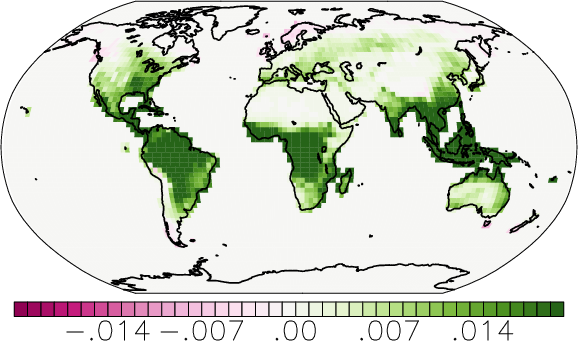

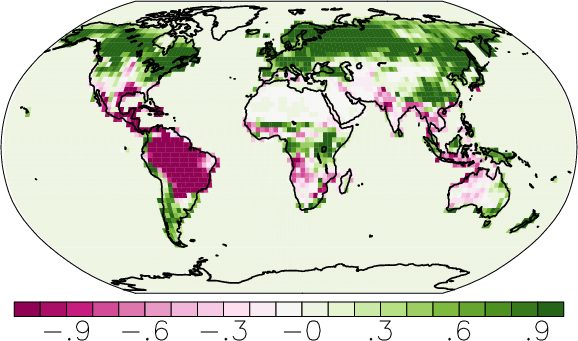

/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/conventions.py:448: SerializationWarning: variable 'netAtmosLandCO2Flux' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  stack_char_dim=stack_char_dim, use_cftime=use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  co

()
 


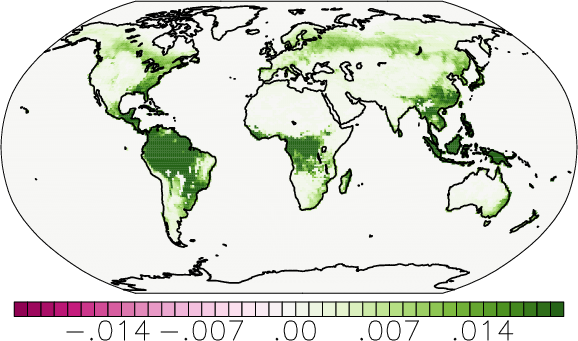

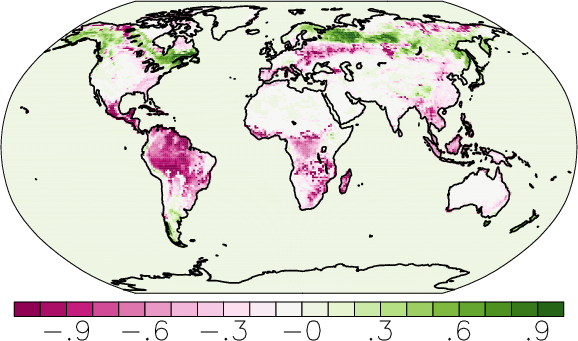

/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/coding/times.py:431: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/coding/times.py:431: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/numpy/core/numeric.py:538: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray ve

()
 


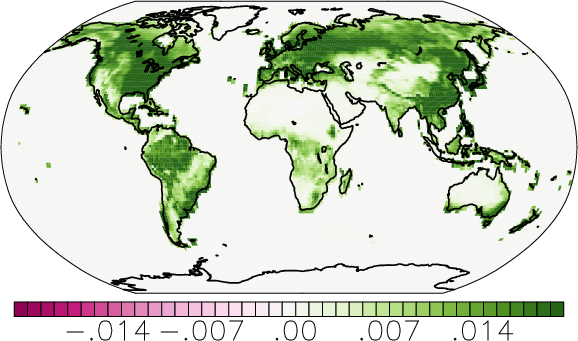

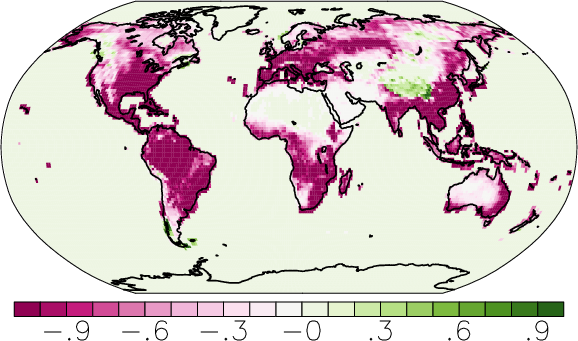

/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset` to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in in future, please use the
new `combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xarray/backends/api.py:783: FutureWarning: In xarray version 0.13 `auto_combine` will be deprecated.
  coords=coords)
/global/homes/c/cdkoven/.conda/envs/jupyter/lib/python3.7/site-packages/xa

()
 


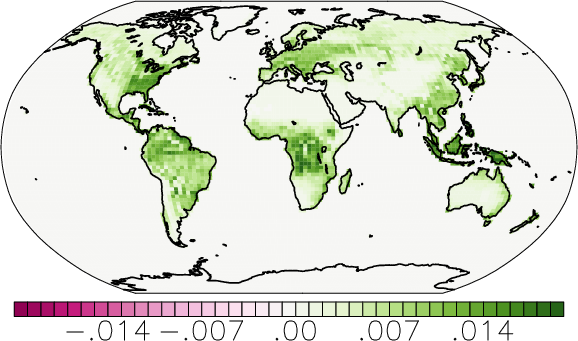

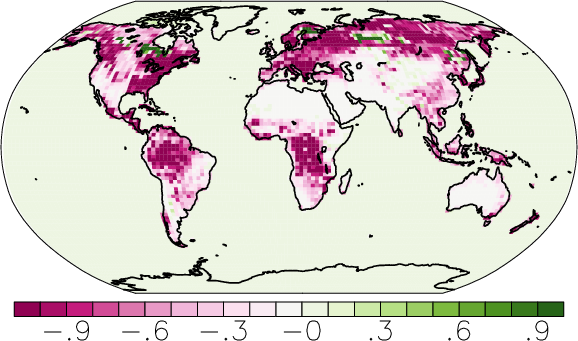

In [16]:
### load netAtmosLandCO2Flux for all models
i_var = vars_list.index('netAtmosLandCO2Flux')
for model_i in range(nmodels):
    land_flux_maps = []
    for exp_i in range(nexps):
        dataset = xr.open_mfdataset(file_master_list_dynamics[model_i][i_var][exp_i])
        #dataset = dataset.rename_vars({'lat_bnds': 'lat_b', 'lon_bnds': 'lon_b'})
        #regridder = xe.Regridder(dataset, ds_out, 'nearest_s2d', reuse_weights=True)
        try:
            netAtmosLandCO2Flux = dataset['netAtmosLandCO2Flux']
        except:
            netAtmosLandCO2Flux = dataset['nbp']
        integrated_landco2flux = smoothlib.monthly_to_annual_xarray(netAtmosLandCO2Flux).cumsum(axis=0)[y_4xco2,:,:] * 86400. * 365.
        land_flux_maps.append(integrated_landco2flux.copy())
        #map_funcs.fill(regridder(integrated_landco2flux).data[:], regrid_lats, regrid_lons, showjupyter=True, levels=np.arange(-300.,330.,30.), colormap='MPL_PiYG', projection='Robinson')
    beta = (land_flux_maps[exps_list.index('1pctco2-bgc')] - land_flux_maps[exps_list.index('piControl')]) / delta_co2_ppm_4xco2
    gamma = (land_flux_maps[exps_list.index('1pctco2')] - land_flux_maps[exps_list.index('1pctco2-bgc')]) / (tas_trajectories[model_i][exps_list.index('1pctco2')] - tas_trajectories[model_i][exps_list.index('piControl')])
    print((tas_trajectories[model_i][exps_list.index('1pctco2')] - tas_trajectories[model_i][exps_list.index('piControl')]).shape)
    map_funcs.fill(beta.data[:], beta.coords['lat'].data, beta.coords['lon'].data, showjupyter=True, levels=np.arange(-2.e-2,2.e-2,1e-3), colormap='MPL_PiYG', projection='Robinson')
    map_funcs.fill(gamma.data[:], gamma.coords['lat'].data, gamma.coords['lon'].data, showjupyter=True, levels=np.arange(-1.,1.,.1), colormap='MPL_PiYG', projection='Robinson')
    #map_funcs.fill(regridder(beta).data[:], regrid_lats, regrid_lons, showjupyter=True, levels=np.arange(-300.,330.,30.), colormap='MPL_PiYG', projection='Robinson')
    #map_funcs.fill(regridder(gamma).data[:], regrid_lats, regrid_lons, showjupyter=True, levels=np.arange(-300.,330.,30.), colormap='MPL_PiYG', projection='Robinson')